# Discrete models task

In [ ]:
1. Load data
2. Apply *SAX* to discretize data and visualize the discretization
3. Apply *N-gram* to discretization data of training data set 1 and obtain 3-gram probability 
4. Firstly, test the n-gram to the training data set 2 to get sensible parameter
5. Test the n-gram to the test data.
6. Check the performance

### Load data

In [31]:
#Necessary packages
import collections
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import pandas as pd
from pandas.plotting import autocorrelation_plot
from datetime import datetime
from SAX import *
from scipy import  stats
import statsmodels.api as sm

In [47]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%y %H')
d1 = pd.read_csv('BATADAL_dataset03.csv', sep='\s*,\s*',parse_dates=['DATETIME'], index_col='DATETIME', squeeze=True,date_parser=dateparse)
d2 = pd.read_csv('BATADAL_dataset04.csv', sep='\s*,\s*',parse_dates=['DATETIME'], index_col='DATETIME', squeeze=True,date_parser=dateparse)
d3 = pd.read_csv('BATADAL_test_dataset.csv', sep='\s*,\s*',parse_dates=['DATETIME'], index_col='DATETIME', squeeze=True,date_parser=dateparse)

L_group = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7']

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  afte

###  Apply SAX to discretize data and visualize the discretization

Here we visualize *L_T1* signal of the **BATADAL_dataset03** as an example to show our discretization

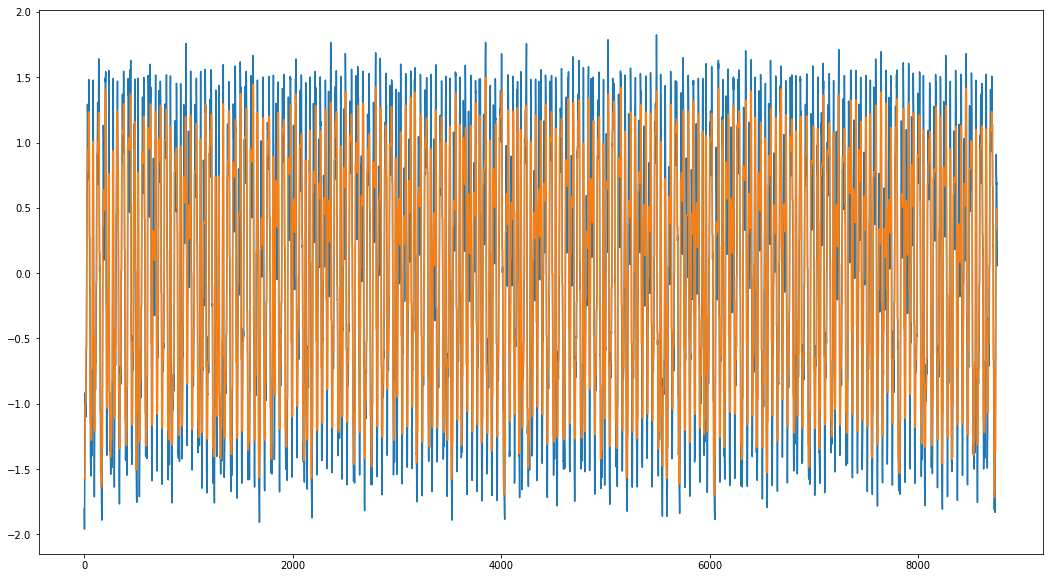

To better visualize the data:


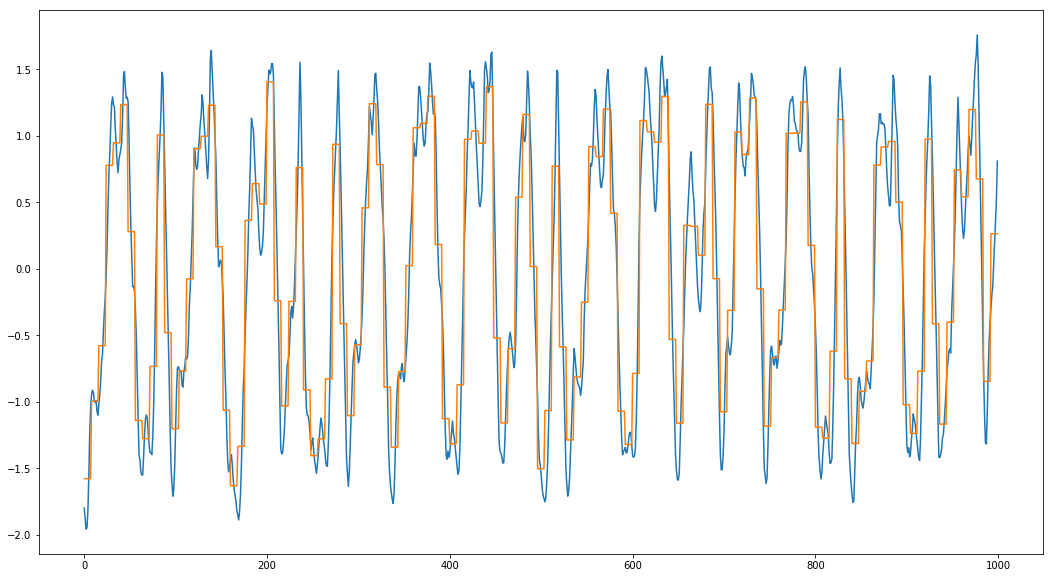

In [51]:
size1=365*3
size2=174*3
size3=87*3

#Setting the sax parameter
sax1=SAX(wordSize = size1, alphabetSize = 5, epsilon = 1e-6)

#Visualize the discretization
t1=d1[L_group[0]]

#Rebuild the PAA data to the length of original data
def rebuildPAAdata(PAAdata,indices):
    size=indices[-1][1]
    data=np.zeros(size)
    for index in indices:
        data[index[0]:index[1]]=PAAdata[indices.index(index)]
    return data

normalized_trn1=sax1.normalize(t1)
PAA_trn1,indices=sax1.to_PAA(normalized_trn1)

#Rebuild PAA data
PAAdata=rebuildPAAdata(PAA_trn1,indices)

fit=plt.figure(figsize=(18,10))
plt.plot(normalized_trn1)
plt.plot(PAAdata)
plt.show()

#To better visualize:
print('To better visualize the data:')
plt.figure(figsize=(18,10))
plt.plot(normalized_trn1[0:1000])
plt.plot(PAAdata[0:1000])

###  Apply *N-gram* to discretization data of training data set 1 and obtain 3-gram probability 
###  Firstly, test the n-gram to the training data set 2 to get sensible parameter
### Test the n-gram to the test data.

In [52]:
#function definition
def n_gram(data,n):
    n_gram_data=[]
    class_profile={}
    ptr=0
    size=len(data)
    #Split data into n-gram
    while ptr<size-n+1:
        sub=data[ptr:ptr+n]
        n_gram_data.append(sub)
        ptr+=1
    #calculate its frequency
    #print(n_gram_data)
    counter=collections.Counter(n_gram_data)
    #print(counter)
    num=len(n_gram_data)
    for gram in counter.most_common(10):
            class_profile[gram[0]]=gram[1]/num
    return counter

def n_gram_prob_matrix(n_gram_data,size):
    matrix=np.ones((size**2,size**2+1))
    for key in n_gram_data.keys():
        #print(key[0:2])
        matrix[size*int(key[0])+int(key[1]),-1]+=n_gram_data.get(key)
        matrix[size*int(key[0])+int(key[1]),size*int(key[1])+int(key[2])]+=n_gram_data.get(key)
    #print(matrix)
    #print(sum(matrix[:,-1]))
    #print(sum(sum(matrix[:,:-1])))
    matrix[:,-1]/=sum(matrix[:,-1])
    matrix[:,:-1]/=sum(sum(matrix[:,:-1]))
    #print(sum(sum(matrix[:,:-1])))
    return matrix

def get_prob(seg,matrix,size):
    prob=matrix[size*int(seg[0])+int(seg[1]),-1]
    for i in range(1,len(seg)-1-2):
        prob*=matrix[size*int(seg[i])+int(seg[i+1]),size*int(seg[i+1])+int(seg[i+2])]
    return prob
        

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning 

L_T1


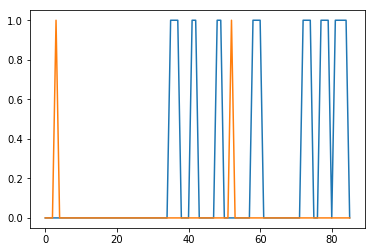

TP: 0  FP: 2
TN: 64  FN: 20
L_T2


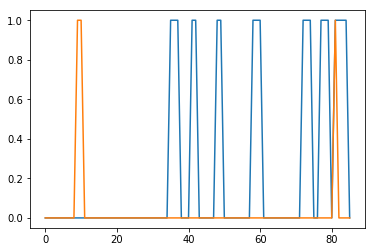

TP: 1  FP: 2
TN: 64  FN: 19
L_T3


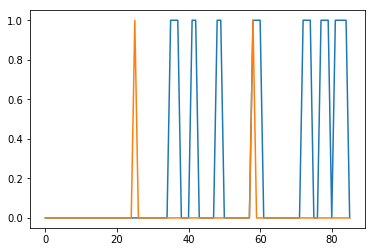

TP: 1  FP: 1
TN: 65  FN: 19
L_T4


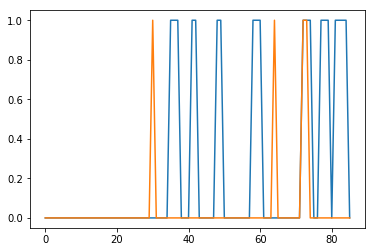

TP: 2  FP: 2
TN: 64  FN: 18
L_T5


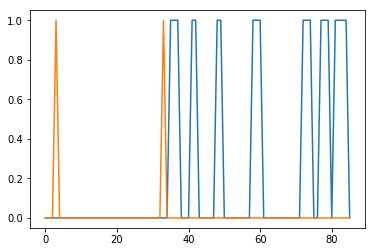

TP: 0  FP: 2
TN: 64  FN: 20
L_T6


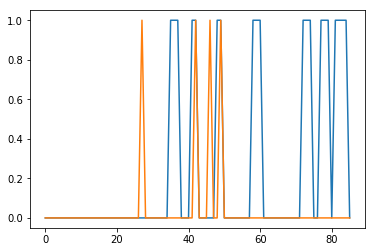

TP: 2  FP: 2
TN: 64  FN: 18
L_T7


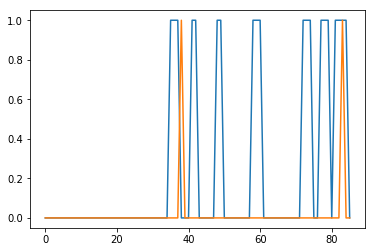

TP: 1  FP: 1
TN: 65  FN: 19


In [54]:
#Test it in the training data set 2
from SAX import *
d1 = pd.read_csv('BATADAL_dataset03.csv', sep='\s*,\s*',parse_dates=['DATETIME'], index_col='DATETIME', squeeze=True,date_parser=dateparse)
d2 = pd.read_csv('BATADAL_dataset04.csv', sep='\s*,\s*',parse_dates=['DATETIME'], index_col='DATETIME', squeeze=True,date_parser=dateparse)
d3 = pd.read_csv('BATADAL_test_dataset.csv', sep='\s*,\s*',parse_dates=['DATETIME'], index_col='DATETIME', squeeze=True,date_parser=dateparse)

threshold=[0.0000000000001,0.000000000000005,0.000000001,0.00000000000002,0.000000001,0.000000000005,0.0000000000001]

L_group = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7']
predresult=[]
precision_list_train04_series=[]
recall_list_train04_series=[]
accuracy_list_train04_series=[]
for test in L_group:

    t1=d1[test]
    t2=d2[test]
    t3=d3[test]
    ################
    #Obtain training set & label
    ################
    
    size1=365*3
    size2=174*3
    size3=87*3

    #Setting the sax parameter
    sax1=SAX(wordSize = size1, alphabetSize = 5, epsilon = 1e-6)
    sax2=SAX(wordSize = size2, alphabetSize = 5, epsilon = 1e-6)
    sax3=SAX(wordSize = size3, alphabetSize = 5, epsilon = 1e-6)

    #Obtain sax data
    t1_letter,t1_indices=sax1.to_letter_rep(t1)
    t2_letter,t2_indices=sax2.to_letter_rep(t2)
    t3_letter,t3_indices=sax3.to_letter_rep(t3)

    
    #t1_stringRep,t1_windowIndices=sax1.sliding_window(t1_letter,40,20)
    t2_stringRep,t2_windowIndices=sax2.sliding_window(t2_letter,9,6)
    t3_stringRep,t3_windowIndices=sax3.sliding_window(t3_letter,9,6)
    #print(len(t1_stringRep))
    #print(stringRep[-1])
    
    #Obtain n-gram probability matrix
    n_gram_data=n_gram(t1_letter,3)
    #print(len(n_gram_data))
    #print(sum(n_gram_data.values()))
    prob_matrix=n_gram_prob_matrix(n_gram_data,5)
    
    
    #Obtain the training set 2 label
    flag=['ATT_FLAG']
    d2_flag=d2[flag]
    d2_label=d2_flag.values
    d2_label=d2_label.transpose()
    d2_label=d2_label.tolist()[0]
    
    sax_label_trn=np.zeros(size2)
    
    ind=0
    for i in t2_indices:
        if 1 in d2_label[i[0]:i[1]]:
            sax_label_trn[ind]=1
        ind+=1;
    
    ind=0
    window_label_trn=np.zeros(len(t2_windowIndices))
    for j in t2_windowIndices:
        if 1 in sax_label_trn[j[0]:j[1]]:
            window_label_trn[ind]=1
        ind+=1;
        
    print(test)
    plt.plot(window_label_trn)
            
    
    #Classifier
    num=len(t2_stringRep)
    predlabel=np.zeros(num)
    ind=0

    for seg in t2_stringRep:
        get_prob(seg,prob_matrix,5)
        if get_prob(seg,prob_matrix,5)<threshold[L_group.index(test)]:
            predlabel[ind]=1
        ind+=1
    plt.plot(predlabel)
    plt.show()
    
    #predresult.append((predlabel+window_label_test).tolist().count(2)/len(window_label_test))
    predresult.append((predlabel+window_label_trn).tolist().count(2))
    tp=(predlabel+window_label_trn).tolist().count(2)
    fp=(predlabel-window_label_trn).tolist().count(1)
    tn=(predlabel+window_label_trn).tolist().count(0)
    fn=(predlabel-window_label_trn).tolist().count(-1)
    if tp+fn!=0:
        precision_list_train04_series.append(tp/(tp+fn))
    else:
        precision_list_train04_series.append(0)
    if (tp+fp)!=0:
        recall_list_train04_series.append(tp/(tp+fp))
    else:
        recall_list_train04_series.append(0)
    if (tp+tn+fp+fn)!=0:
        accuracy_list_train04_series.append((tp+tn)/(tp+tn+fp+fn))
    else:
        accuracy_list_train04_series.append(0)
    print('TP:',tp,' FP:',fp)
    print('TN:',tn,' FN:',fn)
    
    
#print(window_label_trn.tolist())
#print(predresult)

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning 

L_T1


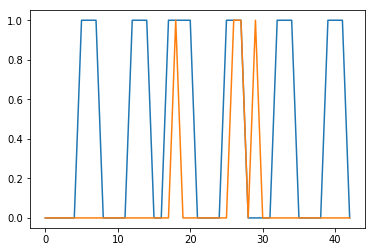

TP: 3  FP: 1
TN: 23  FN: 16
L_T2


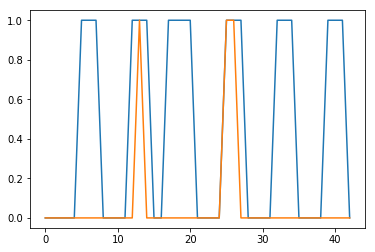

TP: 3  FP: 0
TN: 24  FN: 16
L_T3


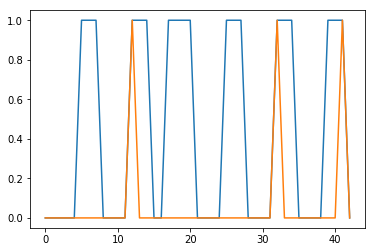

TP: 3  FP: 0
TN: 24  FN: 16
L_T4


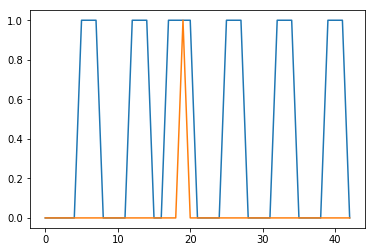

TP: 1  FP: 0
TN: 24  FN: 18
L_T5


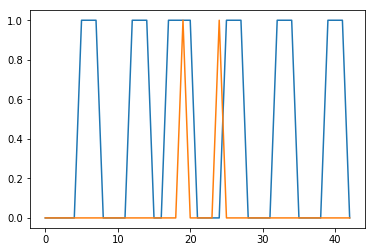

TP: 1  FP: 1
TN: 23  FN: 18
L_T6


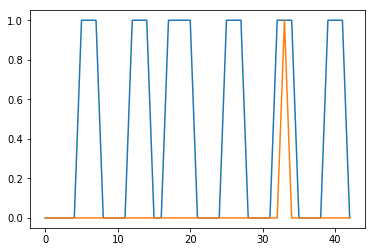

TP: 1  FP: 0
TN: 24  FN: 18
L_T7


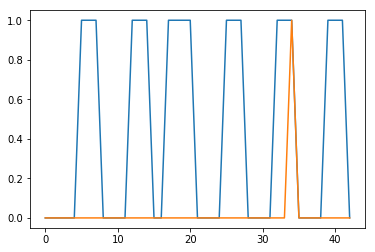

TP: 1  FP: 0
TN: 24  FN: 18


In [55]:
#Test it in the test data
from SAX import *
d1 = pd.read_csv('BATADAL_dataset03.csv', sep='\s*,\s*',parse_dates=['DATETIME'], index_col='DATETIME', squeeze=True,date_parser=dateparse)
d2 = pd.read_csv('BATADAL_dataset04.csv', sep='\s*,\s*',parse_dates=['DATETIME'], index_col='DATETIME', squeeze=True,date_parser=dateparse)
d3 = pd.read_csv('BATADAL_test_dataset.csv', sep='\s*,\s*',parse_dates=['DATETIME'], index_col='DATETIME', squeeze=True,date_parser=dateparse)

threshold=[0.0000000000005,0.0000000000000005,0.00000004,0.00000000000002,0.000000005,0.000000000005,0.0000000000001]
L_group = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7']
predresult=[]
precision_list_test_series=[]
recall_list_test_series=[]
accuracy_list_test_series=[]
for test in L_group:

    t1=d1[test]
    t2=d2[test]
    t3=d3[test]
    
    size1=365*3
    size2=174*3
    size3=87*3

    #Setting the sax parameter
    sax1=SAX(wordSize = size1, alphabetSize = 5, epsilon = 1e-6)
    sax2=SAX(wordSize = size2, alphabetSize = 5, epsilon = 1e-6)
    sax3=SAX(wordSize = size3, alphabetSize = 5, epsilon = 1e-6)

    #Obtain sax data
    t1_letter,t1_indices=sax1.to_letter_rep(t1)
    t2_letter,t2_indices=sax2.to_letter_rep(t2)
    t3_letter,t3_indices=sax3.to_letter_rep(t3)

    t1_stringRep,t1_windowIndices=sax1.sliding_window(t1_letter,40,20)
    t2_stringRep,t2_windowIndices=sax2.sliding_window(t2_letter,9,6)
    t3_stringRep,t3_windowIndices=sax3.sliding_window(t3_letter,9,6)

    
    #Obtain n-gram probability matrix
    n_gram_data=n_gram(t1_letter,3)
    #print(len(n_gram_data))
    #print(sum(n_gram_data.values()))
    prob_matrix=n_gram_prob_matrix(n_gram_data,5)
    
    
    #Obtain the  label of testdata
    flag=['AUU_FLAG']
    d3_flag=d3[flag]
    d3_label=d3_flag.values
    d3_label=d3_label.transpose()
    d3_label=d3_label.tolist()[0]

    sax_label_test=np.zeros(size3)

    ind=0
    for i in t3_indices:
        if 1 in d3_label[i[0]:i[1]]:
           # #print('yes')
            sax_label_test[ind]=1
        ind+=1;

    ind=0
    window_label_test=np.zeros(len(t3_windowIndices))
    for j in t3_windowIndices:
        if 1 in sax_label_test[j[0]:j[1]]:
            # #print('yes')
            window_label_test[ind]=1
        ind+=1;
    window_label_test.tolist()
    plt.plot(window_label_test)


        
    
    #Classifier
    num=len(t3_stringRep)
    predlabel=np.zeros(num)
    ind=0
    for seg in t3_stringRep:
        #print(get_prob(seg,prob_matrix,5))
        #print(x)
        #resultindex[ind]=x.index(min(x))
        #print(len(x),x.index(min(x)))
        if get_prob(seg,prob_matrix,5)<threshold[L_group.index(test)]:
            predlabel[ind]=1
        ind+=1
    
    print(test)
    plt.plot(predlabel)
    plt.show()
    
    predresult.append((predlabel+window_label_test).tolist().count(2))
    tp=(predlabel+window_label_test).tolist().count(2)
    fp=(predlabel-window_label_test).tolist().count(1)
    tn=(predlabel+window_label_test).tolist().count(0)
    fn=(predlabel-window_label_test).tolist().count(-1)
    if tp+fn!=0:
        precision=tp/(tp+fn)
        precision_list_test_series.append(tp/(tp+fn))
    else:
        precision=0
        precision_list_test_series.append(0)
    if tp+fp!=0:
        #recall=
        recall_list_test_series.append(tp/(tp+fp))
    else:
        recall_list_test_series.append(0)
    if (tp+tn+fp+fn)!=0:
        accuracy_list_test_series.append((tp+tn)/(tp+tn+fp+fn))
    else:
        accuracy_list_test_series.append(0)
    print('TP:',tp,' FP:',fp)
    print('TN:',tn,' FN:',fn)

    
    #predresult.append((predlabel+window_label_test).tolist().count(2))
    #print('TP:',(predlabel+window_label_test).tolist().count(2),' FP:',(predlabel-window_label_test).tolist().count(1))
    #print('TN:',(predlabel+window_label_test).tolist().count(0),' FN:',(predlabel-window_label_test).tolist().count(-1))
#print(window_label_test.tolist())
#print(predresult)

 ### Check the performance

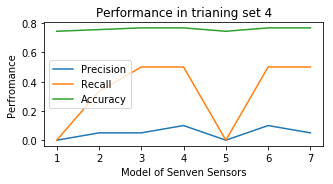

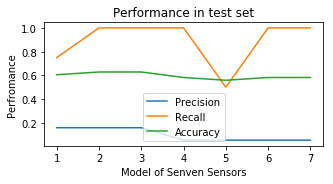

In [56]:
#Check the performance
x_index=[1,2,3,4,5,6,7]
plt.figure(figsize=(5,5))
plt.subplot(2,1,1)
plt.plot(x_index,precision_list_train04_series,label = 'Precision')
plt.plot(x_index,recall_list_train04_series,label = 'Recall')
plt.plot(x_index,accuracy_list_train04_series,label = 'Accuracy')
plt.legend()
plt.title('Performance in trianing set 4')
plt.xlabel('Model of Senven Sensors')
plt.ylabel('Perfromance')
plt.show()
plt.figure(figsize=(5,5))
plt.subplot(2,1,2)
plt.plot(x_index,precision_list_test_series,label = 'Precision')
plt.plot(x_index,recall_list_test_series,label = 'Recall')
plt.plot(x_index,accuracy_list_test_series,label = 'Accuracy')
plt.legend()
plt.title('Performance in test set')
plt.xlabel('Model of Senven Sensors')
plt.ylabel('Perfromance')
plt.show()